In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedKFold
from joblib import dump, load
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
grid_search_lr = load('LogReg_2Class.joblib') 

In [3]:
grid_search_xgb = load('XGB_2Class.joblib') 

In [4]:
grid_search_mlp = load('MLP_2Class.joblib') 

In [5]:
test = pd.read_excel('Test Set 20.xlsx')
test.head()

,pdb,Hbond,Hphob,consurf,asa,Electron-ion interaction potential,Hydrophobicity,Number of electrostatic charge,Number of potential hydrogen bonds,Hydrophilicity,Propensity,Isoelectric points,2-class,3-class
0,1a4y,1,0,6,0.360,0.0959,-1.76,1,4,-0.5,0.27,5.405,1,2
1,1a4y,2,0,5,0.994,0.0242,-0.40,0,4,-0.5,0.41,5.565,0,0
2,1a4y,3,0,7,0.173,0.0761,-0.69,0,4,0.2,-0.11,5.650,0,0
3,1a4y,1,0,3,0.501,0.0959,-1.76,1,4,-0.5,0.27,5.405,0,0
4,1a4y,4,0,8,0.690,0.0959,-1.76,1,4,-0.5,0.27,5.405,0,0


In [6]:
X_test = test.iloc[:, 1:12]

In [7]:
y_test  = test['2-class']

In [8]:
y_predlr =grid_search_lr.predict(X_test)

In [9]:
y_predxgb =grid_search_xgb.predict(X_test)

In [10]:
y_predmlp =grid_search_mlp.predict(X_test)

In [11]:
# cm1 = confusion_matrix(y_test,y_pred)
# cm1

In [12]:
# precision = cm1[0,0]/(cm1[0,0]+cm1[0,1])
# sen_recall = cm1[0,0]/(cm1[0,0]+cm1[1,0])
# acc = accuracy_score(y_test,y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')
# mcc = matthews_corrcoef(y_test, y_pred)
# auc = roc_auc_score(y_test, y_pred)
# auc1 = roc_auc_score(y_test, y_pred, average='weighted')
# specificity =  cm1[1,1]/(cm1[0,1]+cm1[1,1])


In [13]:
# print(precision)

# print(sen_recall)

# print(acc)

# print(f1)

# print(mcc)

# print(auc)

# print(specificity)


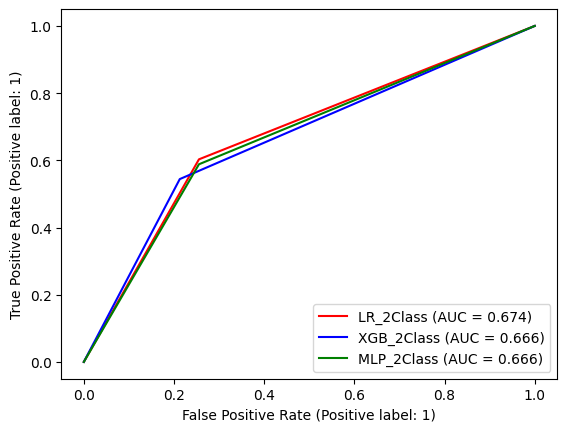

In [14]:
from sklearn.metrics import RocCurveDisplay
lr = RocCurveDisplay.from_predictions(y_test,y_predlr, name = 'LR_2Class', color = 'red', label = 'LR_2Class (AUC = 0.674)')

xgb = RocCurveDisplay.from_predictions(y_test,y_predxgb, ax=lr.ax_,name = 'XGB_2Class', color= 'blue', label = 'XGB_2Class (AUC = 0.666)')
mlp = RocCurveDisplay.from_predictions(y_test, y_predmlp, ax=lr.ax_,name = 'MLP_2Class', color = 'green', label = 'MLP_2Class (AUC = 0.666)' )

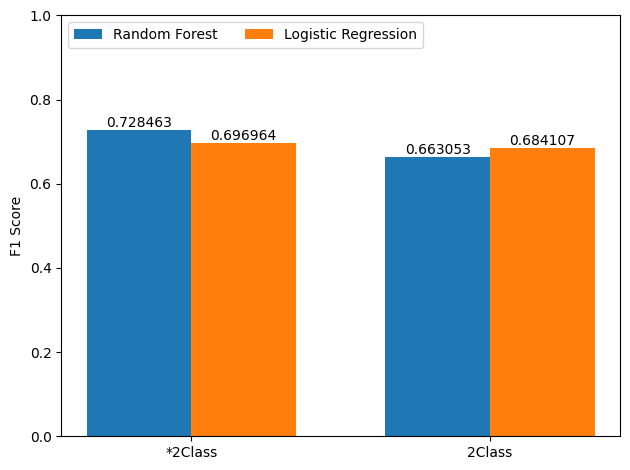

In [15]:
import matplotlib.pyplot as plt
import numpy as np
 
#data
#x-axis
Classifiers = ['*2Class', '2Class']
#y-axis
random = [0.728463312, 0.663052721]
log = [0.696964177,0.68410701]
 
#bar chart properties
x = np.arange(len(Classifiers))
width = 0.35
 
#draw grouped bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, random, width, label='Random Forest')
bar2 = ax.bar(x + width/2, log, width, label='Logistic Regression')
 
#ax.set_xlabel('Year')
ax.set_ylabel('F1 Score')

ax.set_xticks(x, Classifiers)

ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)
 
#setting bar labels
ax.bar_label(bar1)
ax.bar_label(bar2)
#ax.set_title('Comparison of F1 score on the best clasifier of each study')
fig.tight_layout()
 
plt.show()